In [30]:
# Load required packages
library(dplyr,warn.conflicts=F)
library(stringr,warn.conflicts=F)
library(psych,warn.conflicts=F)
library(lplyr,warn.conflicts=F)

In [31]:
# load the stats
data.tourney <- readRDS('../datafiles_rds/NCAATourneyDetailedResults.rds')
# keep 2014+
data.tourney %>% filter(Season>2013) -> data.tourney

In [32]:
# store 68 tourney teams 
data.tourney %>% 
    select(Season,TeamID=WTeamID) %>% 
    bind_rows(data.tourney %>% 
              select(Season,TeamID=LTeamID)) %>% 
    distinct(Season,TeamID) -> df.tourneyteams

In [33]:
# ColleyMatrix 2014+
# https://www.colleyrankings.com/hprev.html
data.colley <- read.csv('../datafiles_csv/ColleyMatrix.csv',stringsAsFactors=F)
data.colley %>% head

season,rank,team,record,rating,SOS,SOS_rannk,wins25,wins50,wins100
2014,1,Florida,36-2,1.116970,0.702078,12,5,14,20
2014,2,Arizona,33-5,1.053500,0.714210,9,6,13,22
2014,3,Wisconsin,30-7,1.018220,0.735422,4,7,10,19
2014,4,Wichita St,34-1,0.999667,0.556791,122,1,3,11
2014,5,Villanova,29-5,0.990831,0.666762,51,1,4,14
2014,6,Iowa St,28-8,0.972404,0.720871,7,5,12,17


In [34]:
# We need Name, Rank and Rating as column name
data.colley %>% rename(Season=season,
                       Name=team,
                       Rank=rank,
                       Rating=rating) -> data.colley

In [35]:
# load team spellings variations
data.teamspellings <- readRDS('../datafiles_rds/TeamSpellings.rds')
data.teams <- readRDS('../datafiles_rds/Teams.rds')

In [36]:
# add TeamID based on team name
data.colley %>% 
    mutate(LowName=str_to_lower(Name)) %>% 
    left_join(data.teamspellings,by=c('LowName'='TeamNameSpelling')) -> df.ratingsystem

In [37]:
df.ratingsystem %>% filter(str_detect(Name,'rhode'))

Season,Rank,Name,record,Rating,SOS,SOS_rannk,wins25,wins50,wins100,LowName,TeamID


In [38]:
# missing tourney team in stats (because name misspelling)
df.ratingsystem %>% 
    right_join(df.tourneyteams,by='TeamID') %>%
    filter(is.na(Rank)) %>%
    select(TeamID) %>%
    inner_join(data.teams,by='TeamID') %>%
    distinct() %>%
    arrange(TeamID)

TeamID,TeamName,FirstD1Season,LastD1Season
1113,Arizona St,1985,2019
1114,Ark Little Rock,1985,2019
1151,Chattanooga,1985,2019
1153,Cincinnati,1985,2019
1158,Col Charleston,1992,2019
1168,CS Fullerton,1985,2019
1186,E Washington,1985,2019
1192,F Dickinson,1985,2019
1203,G Washington,1985,2019
1209,Georgia St,1985,2019


In [39]:
# add missing TeamID from Colley stats
df.ratingsystem %>%
    mutate_which(str_detect(LowName,'^arizona'),TeamID=1112) %>%
    mutate_which(str_detect(LowName,'ariz st'),TeamID=1113) %>%
    mutate_which(str_detect(LowName,'rock'),TeamID=1114) %>%
    mutate_which(str_detect(LowName,'chat'),TeamID=1151) %>%
    mutate_which(str_detect(LowName,'cincy'),TeamID=1153) %>%
    mutate_which(str_detect(LowName,'col chrlstn'),TeamID=1158) %>%
    mutate_which(str_detect(LowName,'cs full'),TeamID=1168) %>%
    mutate_which(str_detect(LowName,'e wash'),TeamID=1186) %>%
    mutate_which(str_detect(LowName,'fairl dcknsn'),TeamID=1192) %>%
    mutate_which(str_detect(LowName,'geo wash'),TeamID=1203) %>%
    mutate_which(str_detect(LowName,'georgia'),TeamID=1208) %>%
    mutate_which(str_detect(LowName,'ga st'),TeamID=1209) %>%
    mutate_which(str_detect(LowName,'jackson st'),TeamID=1240) %>%
    mutate_which(str_detect(LowName,'kent st'),TeamID=1245) %>%
    mutate_which(str_detect(LowName,'loyola chi'),TeamID=1260) %>%
    mutate_which(str_detect(LowName,'michigan'),TeamID=1276) %>%
    mutate_which(str_detect(LowName,'mich st'),TeamID=1277) %>%
    mutate_which(str_detect(LowName,'new mexico'),TeamID=1307) %>%
    mutate_which(str_detect(LowName,'new mex st'),TeamID=1308) %>%
    mutate_which(str_detect(LowName,'eastern'),TeamID=1318) %>%
    mutate_which(str_detect(LowName,'n iowa'),TeamID=1320) %>%
    mutate_which(str_detect(LowName,'western'),TeamID=1321) %>%
    mutate_which(str_detect(LowName,'oklahoma'),TeamID=1328) %>%
    mutate_which(str_detect(LowName,'okl st'),TeamID=1329) %>%
    mutate_which(str_detect(LowName,'rhisland'),TeamID=1348) %>%
    mutate_which(str_detect(LowName,'morris'),TeamID=1352) %>%
    mutate_which(str_detect(LowName,'f austin'),TeamID=1372) %>%
    mutate_which(str_detect(LowName,'s carolina'),TeamID=1376) %>%
    mutate_which(str_detect(LowName,'southern'),TeamID=1380) %>%
    mutate_which(str_detect(LowName,'st bonny'),TeamID=1382) %>%
    mutate_which(str_detect(LowName,'^st mary'),TeamID=1388) %>%
    mutate_which(str_detect(LowName,'stony brk'),TeamID=1392) %>%
    mutate_which(str_detect(LowName,'^texas$'),TeamID=1400) %>%
    mutate_which(str_detect(LowName,'tex tech'),TeamID=1403) %>%
    mutate_which(str_detect(LowName,'tx sou'),TeamID=1411) %>%
    mutate_which(str_detect(LowName,'irvine'),TeamID=1414) %>%
    mutate_which(str_detect(LowName,'la lafayette'),TeamID=1418) %>%
    mutate_which(str_detect(LowName,'unc ash'),TeamID=1421) %>%
    mutate_which(str_detect(LowName,'unc grnsbro'),TeamID=1422) %>%
    mutate_which(str_detect(LowName,'unc wilm'),TeamID=1423) %>%
    mutate_which(str_detect(LowName,'valpo'),TeamID=1434) %>%
    mutate_which(str_detect(LowName,'west mich'),TeamID=1444) %>%
    mutate_which(str_detect(LowName,'wvu'),TeamID=1452) %>%
    mutate_which(str_detect(LowName,'virginia'),TeamID=1438) %>%
    mutate_which(str_detect(LowName,'virginia tech'),TeamID=1439) %>% 
    mutate_which(str_detect(LowName,'green bay'),TeamID=1453) %>%
    mutate_which(str_detect(LowName,'wi milw'),TeamID=1454) -> df.ratingsystem

In [40]:
# check if ssomething is still wrong
df.ratingsystem %>% 
    right_join(df.tourneyteams,by='TeamID') %>%
    filter(is.na(Rank)) %>%
    select(TeamID) %>%
    inner_join(data.teams,by='TeamID') %>%
    distinct() %>%
    arrange(TeamID)

TeamID,TeamName,FirstD1Season,LastD1Season


In [41]:
df.ratingsystem %>% head

Season,Rank,Name,record,Rating,SOS,SOS_rannk,wins25,wins50,wins100,LowName,TeamID
2014,1,Florida,36-2,1.116970,0.702078,12,5,14,20,florida,1196
2014,2,Arizona,33-5,1.053500,0.714210,9,6,13,22,arizona,1112
2014,3,Wisconsin,30-7,1.018220,0.735422,4,7,10,19,wisconsin,1458
2014,4,Wichita St,34-1,0.999667,0.556791,122,1,3,11,wichita st,1455
2014,5,Villanova,29-5,0.990831,0.666762,51,1,4,14,villanova,1437
2014,6,Iowa St,28-8,0.972404,0.720871,7,5,12,17,iowa st,1235


In [42]:
# restrict stats to tourney teams
df.ratingsystem %>% 
    inner_join(df.tourneyteams,by=c('TeamID','Season')) %>%
    select(Season,TeamID,Rating) -> df.ratingsystem

In [43]:
# Check if we have 68 teams per Season
df.ratingsystem %>% 
    group_by(Season) %>% 
    count

Season,n
2014,68
2015,68
2016,68
2017,68
2018,68


In [44]:
# check missing TeamID per Season 
df.tourneyteams %>% 
    anti_join(df.ratingsystem,by=c('Season','TeamID')) %>%
    inner_join(data.teams,by='TeamID') %>%
    select(TeamID,TeamName) %>%
    distinct()

TeamID,TeamName


In [45]:
# load true results
data.truth <- readRDS('../datafiles_rds/TourneyTrueResults.rds')

In [46]:
# slope hyper parameter grid : we will compute 51 models and chose the best one (min logloss)
df.ratingsystem %>% 
    mutate(dummy=1) %>% 
    inner_join(data.frame(qtl=seq(0.01,0.99,0.01),dummy=1),by='dummy') %>% 
    select(-dummy) %>% 
    group_by(qtl,Season) %>% 
    mutate(thres=max(Rating)-quantile(Rating,max(qtl)),Slope=3/thres) %>%
    ungroup %>% 
    select(Season,qtl,Slope) %>% 
    distinct() -> df.slopes
df.slopes %>% sample_n(5)

Season,qtl,Slope
2015,0.41,8.433341
2015,0.13,5.592861
2015,0.56,9.683247
2015,0.61,10.469187
2018,0.22,7.698330


In [47]:
# matchups dataframe : all the possible matches between the 68 teams per Season 
df.ratingsystem %>% 
    inner_join(df.ratingsystem,by='Season') %>% 
    filter(TeamID.x < TeamID.y) -> df.matchup
df.matchup %>% sample_n(5)

Season,TeamID.x,Rating.x,TeamID.y,Rating.y
2017,1411,0.530064,1436,0.759388
2015,1214,0.370073,1374,0.879504
2015,1209,0.673803,1314,0.927064
2014,1173,0.844640,1196,1.116970
2018,1438,1.074500,1460,0.628102


In [48]:
# all matchs with all 51 hyper parameter setting (qtl=[0.25,0.75]) 
df.matchup %>% inner_join(df.slopes,by=c('Season')) -> df.matchup
df.matchup %>% sample_n(5)

Season,TeamID.x,Rating.x,TeamID.y,Rating.y,qtl,Slope
2017,1321,0.825325,1455,0.885347,0.43,12.49970
2016,1221,0.341269,1268,0.889976,0.89,25.75628
2016,1138,0.620914,1425,0.775655,0.91,30.92961
2017,1278,0.883804,1348,0.817499,0.65,17.30298
2015,1248,0.571269,1433,0.861551,0.89,20.63786


In [49]:
# machups predictions : compute the winning probability of TeamID.x and cap it into [0.05,0.95] to avoid too much logloss is case of FP or FN 
df.matchup %>% 
    mutate(ID=str_c(Season,'_',TeamID.x,'_',TeamID.y)) %>% 
    mutate(Prob=logistic(Rating.x-Rating.y,a=Slope)) %>% 
    mutate(Pred=ifelse(Prob>0.5,1,0)) %>% 
    mutate(Prob=round(Prob,3)) %>%
    mutate_which(Prob>0.95,Prob=0.95) %>%
    mutate_which(Prob<0.05,Prob=0.05) %>%
    select(qtl,ID,Pred,Prob) -> df.submit
df.submit %>% sample_n(5)

qtl,ID,Pred,Prob
0.18,2015_1428_1458,0,0.233
0.13,2014_1124_1462,1,0.655
0.10,2016_1234_1428,0,0.344
0.07,2014_1235_1438,1,0.516
0.88,2018_1328_1438,0,0.050


In [50]:
# merge prediction and truth
data.truth %>% inner_join(df.submit,by='ID') -> df.results

In [51]:
# compute accuracy & Logloss per qtl to find the best one
df.results %>% 
    mutate(OK=ifelse(Pred==Target,1,0)) %>%
    mutate(LogLoss=Target*log(Prob) + (1-Target)*log(1-Prob)) %>%
    group_by(qtl) %>%
    summarise(TC=sum(OK),N=n(),FC=N-TC,Acc=TC/N,LogLoss=-mean(LogLoss)) %>%
    select(qtl,TC,FC,N,Acc,LogLoss) -> df.results.perf
df.results.perf %>% arrange(LogLoss) %>% head()

qtl,TC,FC,N,Acc,LogLoss
0.36,258,77,335,0.7701493,0.4871162
0.35,258,77,335,0.7701493,0.4871363
0.32,258,77,335,0.7701493,0.4871432
0.31,258,77,335,0.7701493,0.4871721
0.33,258,77,335,0.7701493,0.4871823
0.34,258,77,335,0.7701493,0.4872522


In [52]:
library(ggplot2,warn.conflicts=F)

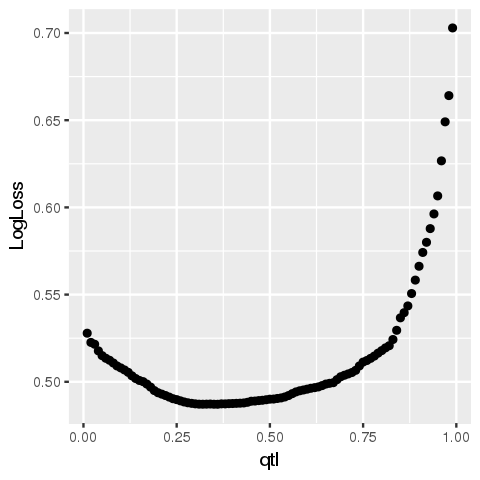

In [53]:
options(repr.plot.width=4, repr.plot.height=4)
qplot(data=df.results.perf,x=qtl,y=LogLoss)

In [54]:
# store the best qtl
df.results.perf %>% 
    arrange(LogLoss) %>% 
    head(1) %>% pull(qtl) -> bestqtl